# MNIST Digit Classifier

Here we are going to use Tensorflow library to build the model and predict Digits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm

C:\tensorflow-gpu\env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\tensorflow-gpu\\env\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [5]:
X_train_full[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train_full.shape

(60000, 28, 28)

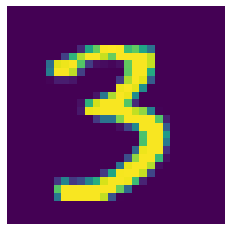

In [7]:
plt.imshow(X_train_full[10000])
plt.axis("off")
plt.show()

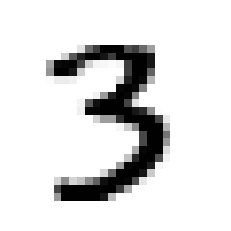

In [8]:
plt.imshow(X_train_full[10000], cmap="binary")
plt.axis("off")
plt.show()

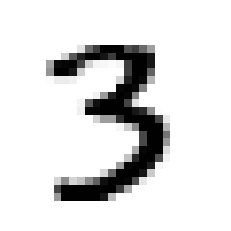

10001


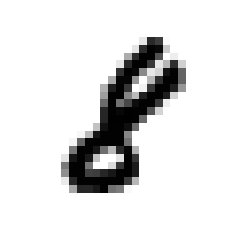

10002


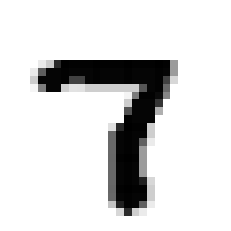

10003


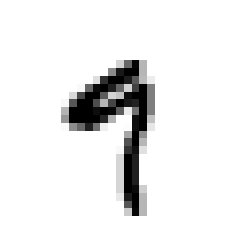

10004


In [10]:
index = 10000
for _ in range(4):
  plt.imshow(X_train_full[index], cmap="binary")
  plt.axis("off")
  plt.show()
  index += 1
  print(index)

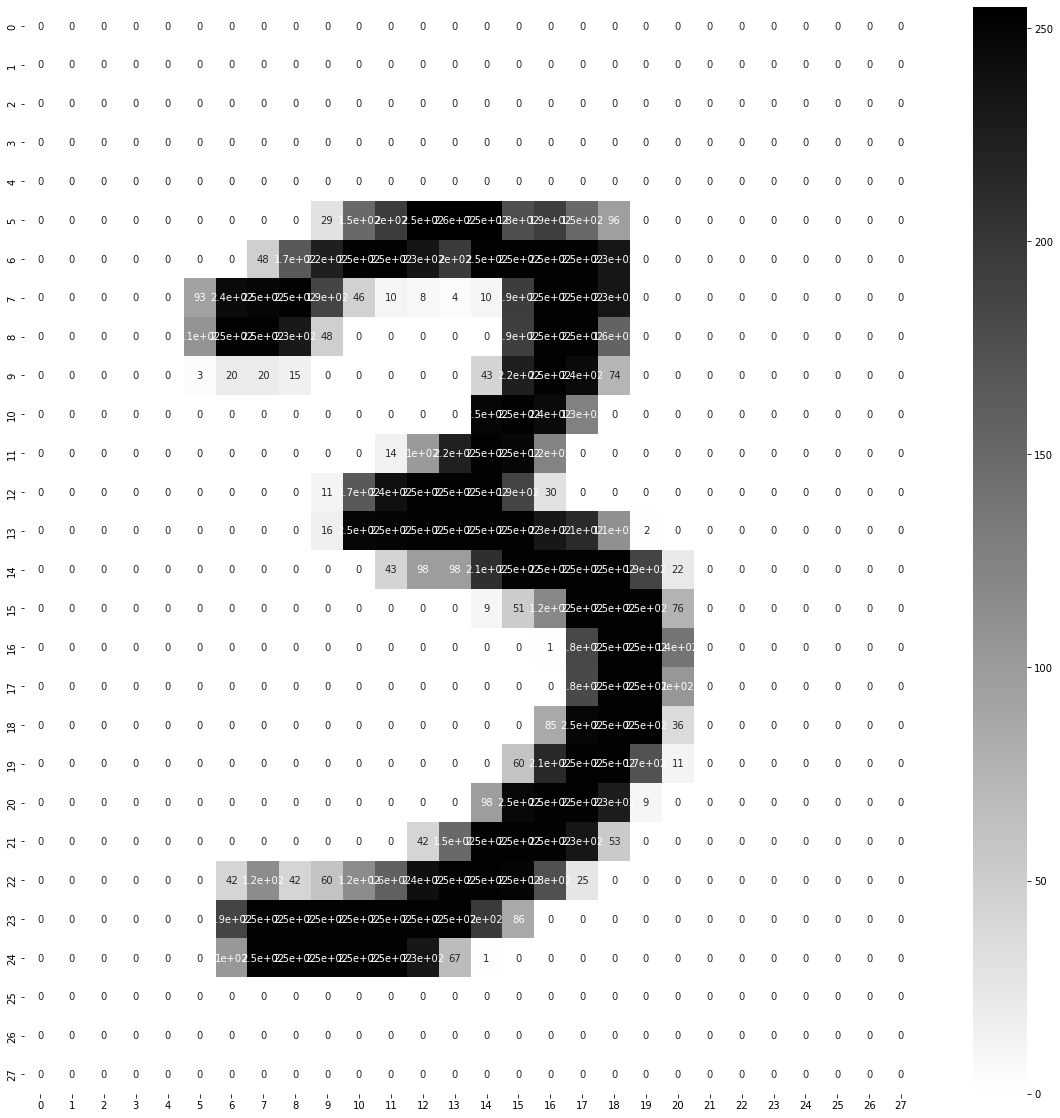

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[10000], annot=True,cmap="binary");

In [12]:
X_valid , X_train = X_train_full[:5000]/255., X_train_full[5000:] / 255.
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
X_test = X_test / 255.

In [14]:
print(X_valid.shape, X_train.shape)

(5000, 28, 28) (55000, 28, 28)


In [15]:
print(y_valid.shape, y_train.shape)

(5000,) (55000,)


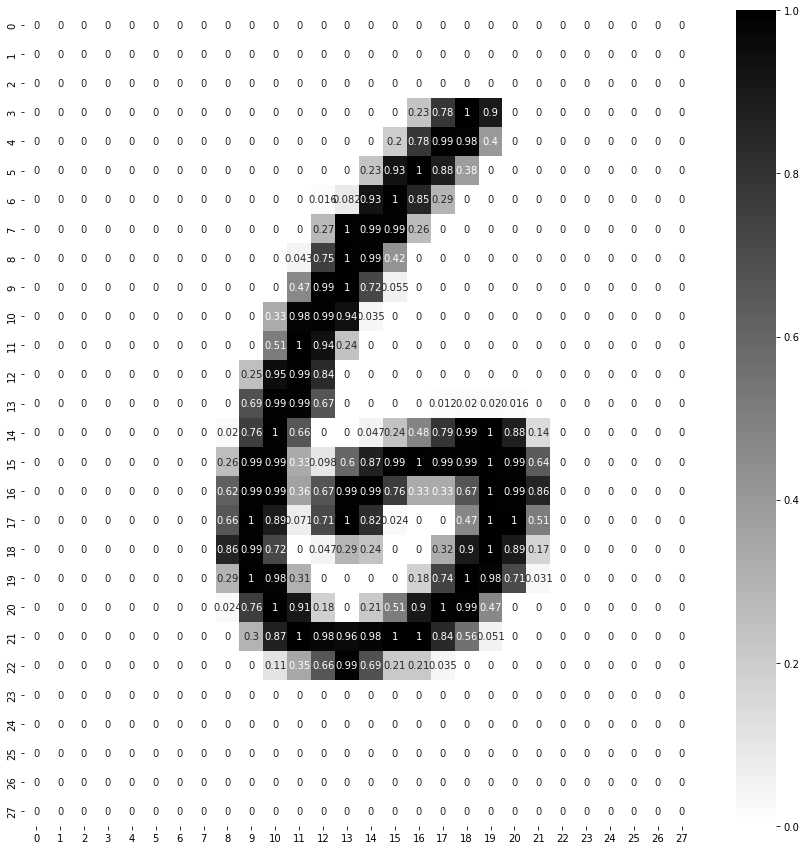

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[1000], annot=True, cmap="binary");

In [17]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name="inputlayer"),
          tf.keras.layers.Dense(300, activation='relu', name="hiddenlayer1"),
          tf.keras.layers.Dense(100, activation='relu', name="hiddenlayer2"),
          tf.keras.layers.Dense(10, activation='softmax', name="outputlayer")]

In [18]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [19]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
LOSS_FUNCTION = tf.keras.losses.SparseCategoricalCrossentropy() # HERE
OPTIMIZER = "ADAM"
METRICS = ["accuracy"]
model_clf.compile(loss=LOSS_FUNCTION,
optimizer=OPTIMIZER,
metrics=METRICS)

In [21]:
model_clf.layers[1].name

'hiddenlayer1'

In [22]:
hidden1 = model_clf.layers[1]

In [23]:
weights,biases = hidden1.get_weights()

In [24]:
weights

array([[ 0.05870047,  0.05473794, -0.02819544, ..., -0.0259279 ,
         0.04284281, -0.00928538],
       [-0.06448293, -0.01130526, -0.04895467, ..., -0.03364463,
        -0.06633686,  0.03047198],
       [-0.03942664,  0.05961402,  0.00201161, ...,  0.01488314,
        -0.00801291,  0.0720256 ],
       ...,
       [-0.0201319 ,  0.00499764,  0.01772893, ..., -0.04953979,
        -0.05170645,  0.03185479],
       [ 0.02893943, -0.03460838, -0.05085226, ..., -0.03474228,
        -0.06052161, -0.03055473],
       [-0.0051704 , -0.01919083, -0.02368135, ...,  0.04056501,
        -0.06194935,  0.04426455]], dtype=float32)

In [26]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)
history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data = VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0915 - val_accuracy: 0.9768
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0238 - accuracy: 0.9921 - val_loss: 0.0766 - val_accuracy: 0.9814
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 0.1211 - val_accuracy: 0.9704
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.1032 - val_accuracy: 0.9776
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0166 - accuracy: 0.9944 - val_loss: 0.0842 - val_accuracy: 0.9828


In [27]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.026274,0.991345,0.091472,0.9768
1,0.023818,0.992091,0.076553,0.9814
2,0.020173,0.993000,0.121131,0.9704
3,0.017240,0.994509,0.103209,0.9776
4,0.016591,0.994418,0.084241,0.9828


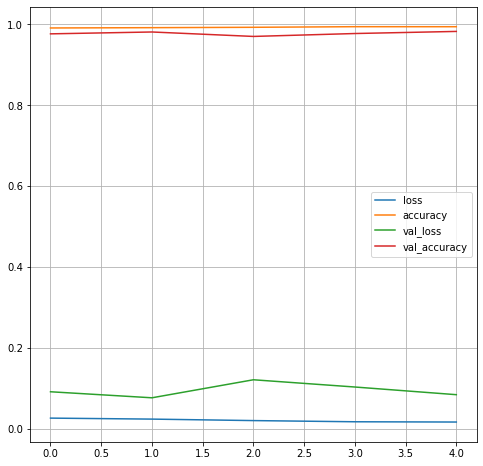

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,8))
plt.grid(True)
plt.show()

In [33]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0790 - accuracy: 0.9819


[0.07897883653640747, 0.9818999767303467]

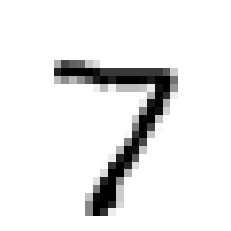

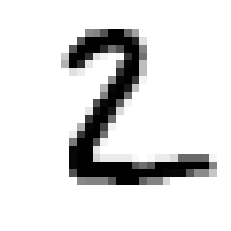

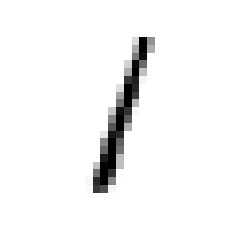

In [34]:
for i in range(0,3):
    plt.imshow(X_test[i], cmap="binary")
    plt.axis("off")
    plt.show()

In [35]:
prediction = model_clf.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [36]:
prediction

array([[1.7284946e-11, 7.7502443e-10, 8.4730827e-11, ..., 1.0000000e+00,
        3.5420589e-10, 2.9091216e-09],
       [2.0822298e-17, 7.4875446e-11, 1.0000000e+00, ..., 2.5943158e-16,
        5.1824525e-16, 9.3475028e-19],
       [2.7092076e-13, 9.9999678e-01, 2.9172025e-09, ..., 1.9140234e-10,
        3.2655221e-06, 2.7684508e-12],
       ...,
       [4.6457484e-17, 7.3185403e-13, 2.1464173e-18, ..., 9.2090301e-11,
        1.6139344e-13, 2.7375296e-10],
       [1.3382436e-13, 7.4250991e-18, 5.8414202e-20, ..., 4.1718994e-15,
        5.3845199e-09, 4.3382546e-15],
       [7.8788267e-14, 1.7066861e-15, 3.6773737e-18, ..., 7.1764372e-21,
        2.7515193e-12, 2.0757983e-13]], dtype=float32)

In [37]:
y_prob = prediction[0]

In [38]:
np.argmax(y_prob.round(5))

7

In [39]:
y_prob = prediction[1]

In [40]:
np.argmax(y_prob.round(5))

2

In [41]:
model_clf.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[1.7284946e-11, 7.7502443e-10, 8.4730827e-11, ..., 1.0000000e+00,
        3.5420589e-10, 2.9091216e-09],
       [2.0822298e-17, 7.4875446e-11, 1.0000000e+00, ..., 2.5943158e-16,
        5.1824525e-16, 9.3475028e-19],
       [2.7092076e-13, 9.9999678e-01, 2.9172025e-09, ..., 1.9140234e-10,
        3.2655221e-06, 2.7684508e-12],
       ...,
       [4.6457484e-17, 7.3185403e-13, 2.1464173e-18, ..., 9.2090301e-11,
        1.6139344e-13, 2.7375296e-10],
       [1.3382436e-13, 7.4250991e-18, 5.8414202e-20, ..., 4.1718994e-15,
        5.3845199e-09, 4.3382546e-15],
       [7.8788267e-14, 1.7066861e-15, 3.6773737e-18, ..., 7.1764372e-21,
        2.7515193e-12, 2.0757983e-13]], dtype=float32)

In [42]:
from tensorflow.keras.models import load_model

In [44]:
import time

def get_long_path(log_dir="/contents/log/fit"):
    fileName = time.strftime("log %Y %m %d %H %M %S")
    log_path = os.path.join(log_dir, fileName)
    print(f"saving logs at :\n{log_path}")
    return log_path

In [45]:
log_dir = get_long_path()

saving logs at :
/contents/log/fit\log 2023 01 31 15 05 30


In [46]:
y_predicted_labels = [np.argmax(i) for i in prediction]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [47]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    2,    1,    1,    2,    0,    0,    2],
       [   0, 1128,    1,    2,    0,    0,    1,    0,    3,    0],
       [   0,    1, 1012,    3,    1,    0,    2,    6,    6,    1],
       [   0,    0,    2,  978,    0,   20,    0,    3,    5,    2],
       [   2,    0,    3,    1,  963,    0,    2,    2,    0,    9],
       [   1,    0,    0,    5,    1,  878,    1,    0,    4,    2],
       [   1,    2,    0,    1,    2,   14,  935,    0,    3,    0],
       [   0,    0,    7,    2,    1,    1,    0, 1010,    2,    5],
       [   2,    1,    1,    6,    1,    4,    0,    2,  952,    5],
       [   0,    2,    0,    1,    7,    1,    0,    4,    1,  993]])>

Text(69.0, 0.5, 'Truth')

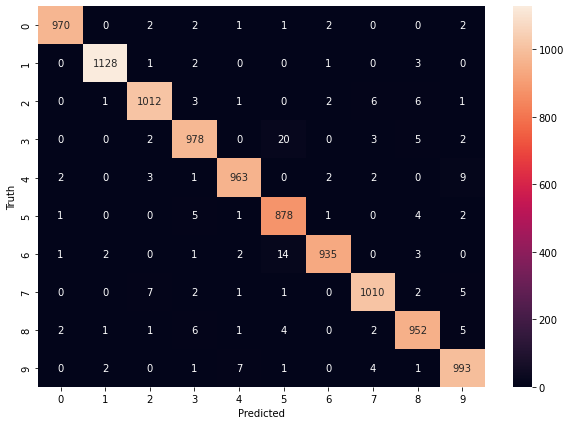

In [48]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
print(len(y_test), len(y_predicted_labels))

10000 10000


In [52]:
y_test[0]

7

In [128]:
def show_100_images(X_test, y_predicted_labels):
    """
    Display a plot of 100 images and their labels from a data batch
    """
    # Setup the figure
    plt.figure(figsize=(20,20))
    
    for i in tqdm(range(100)):
        # Create a subplots ( 25 rows and 5 columns )
        ncols = 5
        nrows = 25
        ax = plt.subplot(nrows , ncols , i+1)
        plt.title(f"Actual : {X_test[i]}   Predicted : {y_predicted_labels[i]}")
        plt.axis("off")
        plt.tight_layout()
        plt.imshow(image[i], cmap="binary")
        

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.55it/s]


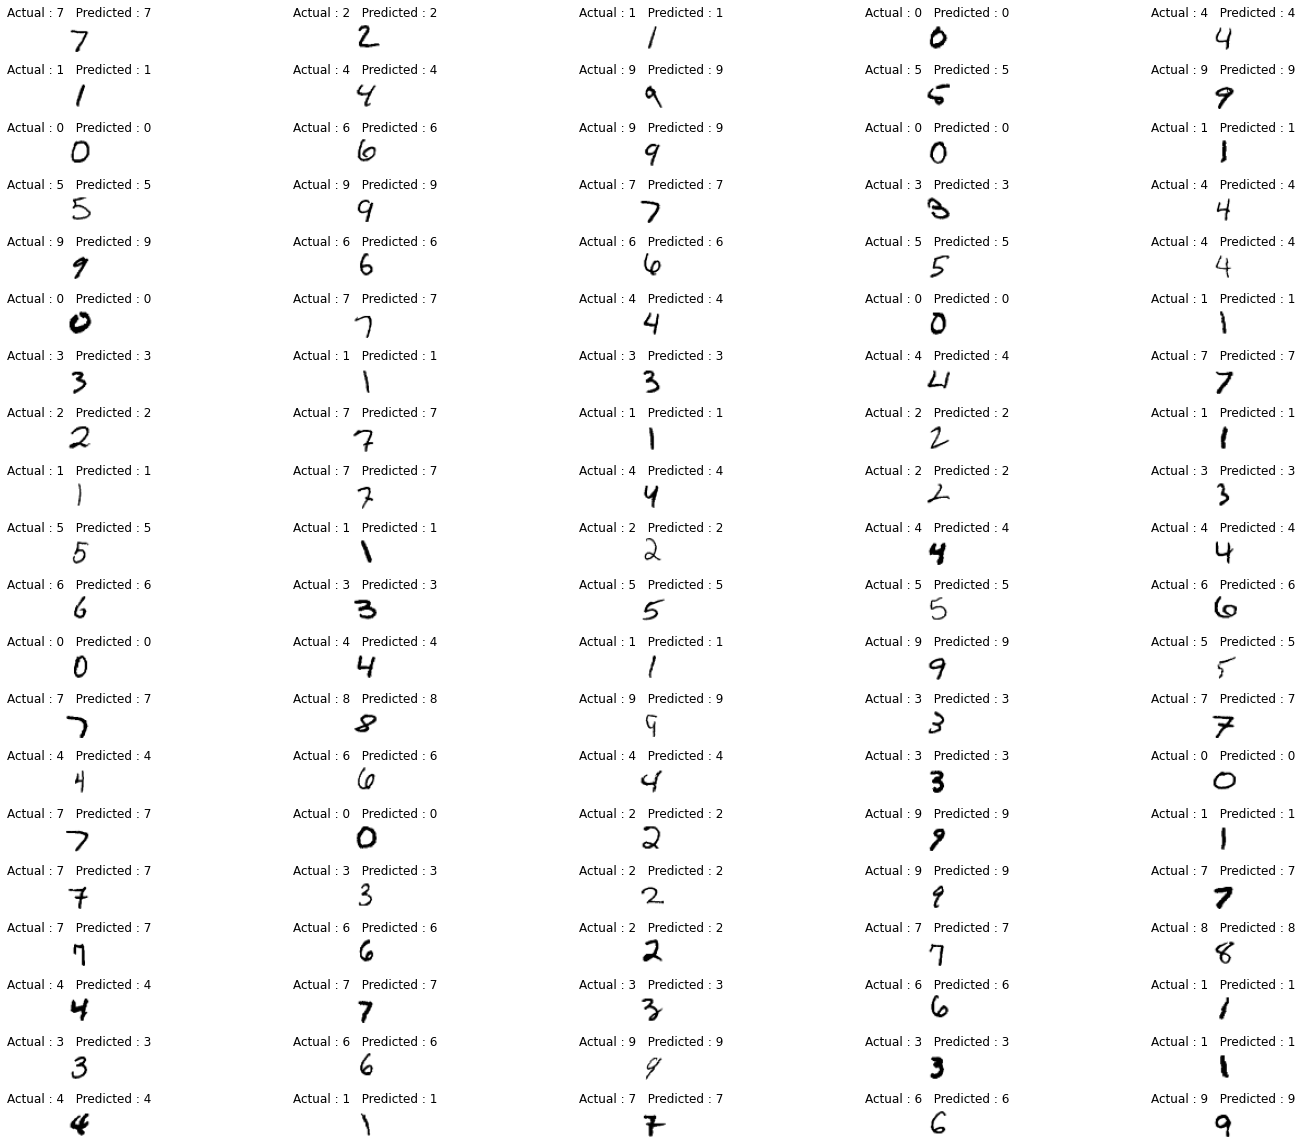

In [130]:
show_100_images(X_test, y_predicted_labels)